In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6

In [2]:
#importing all csv files (three train data files and one test file)
train = pd.read_csv("train.csv")
test = pd.read_csv("test_QoiMO9B.csv")
meal_info  = pd.read_csv("meal_info.csv")
full_info = pd.read_csv("fulfilment_center_info.csv")

In [3]:
#let us check few rows of the dataset
train.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
meal_info.head(5)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
full_info.head(5)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
#chekcing information of all cloumns such as number of cloumns and rows, missing observation and type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


Thre are 3 csv files containing different data coumns with sharing a key cloumns to join. Here we will use merge of pandas library to merge data using left condition.

In [8]:
#Merging meal_info and Full_info file to main train data file using left merge function
trainss = pd.merge(train, meal_info, on='meal_id', how='left')
trainsd = pd.merge(trainss, full_info, on='center_id', how='left')
trainsd.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [9]:
#Getting some insights of updated train data
trainsd.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

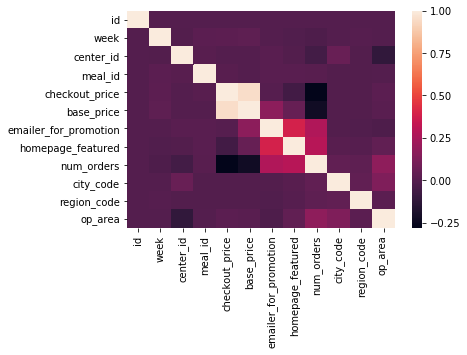

In [10]:
# Plotting correlation map usinng Sns heatmap
cor = trainsd.corr()
sns.heatmap(cor)

In the correlation heatmap we can see that there are only features are correlated with dependent variable i.e. num_orders. The signicantally features are base_price, checkout_price,op_area, center_id. We can with only these some variable to build the model. But after insights into the data, I realised that there are lot of classes in feauters and non-linearity is aslo. So here we will use ensemble algorithms to predict the values. 

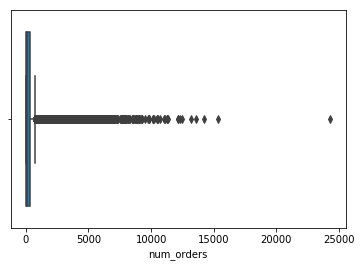

In [11]:
# boxplot of dependent variable to check outlier and range of the data
sns.boxplot(trainsd['num_orders'])

Outliers are present in the num_order columnn but we using ensemble algorithms, it will take care of itself.

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


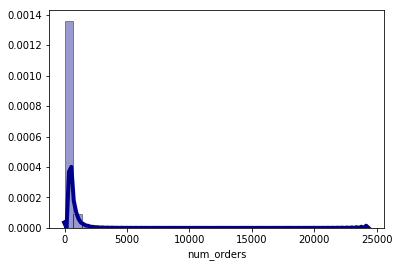

In [12]:
# Plotting a density plot to check distribution of dependent variable
sns.distplot(trainsd['num_orders'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Here we can see that the dependent variable needs to be normalised before using. We take log of all values to normalise the data.

In [13]:
# taking log of num_oders column
trainsd['num_orders'] = np.log(trainsd['num_orders'])

G:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


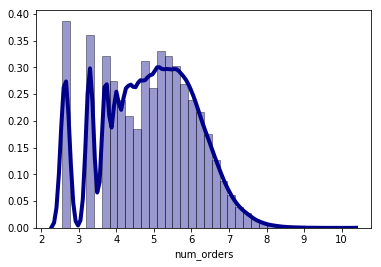

In [14]:
# Now agian checking the distribution of dependent variale
sns.distplot(trainsd['num_orders'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Now column data is normalised but still it is left skewed due to outliers.

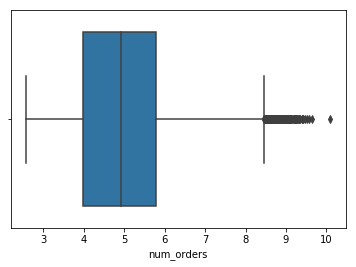

In [15]:
# After normalisation the column values are scaled to a particular range
sns.boxplot(trainsd['num_orders'])

In [16]:
trainsd['num_orders'].head()

0    5.176150
1    5.598422
2    5.241747
3    3.988984
4    3.688879
Name: num_orders, dtype: float64

In [17]:
# Same merging method is also applied on test data
testss = pd.merge(test, meal_info, on='meal_id', how='left')
testsd =  pd.merge(testss, full_info, on='center_id', how='left')
testsd.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0


In [18]:
# Getting dummy values for categorical feature for train and test data
train_hot = trainsd.copy()
train_hot = pd.get_dummies(train_hot, columns=['category','cuisine','center_type'], prefix = '_')
train_hot.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,__Seafood,__Soup,__Starters,__Continental,__Indian,__Italian,__Thai,__TYPE_A,__TYPE_B,__TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,5.176150,647,...,0,0,0,0,0,0,1,0,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,5.598422,647,...,0,0,0,0,0,0,1,0,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,5.241747,647,...,0,0,0,0,0,0,1,0,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,3.988984,647,...,0,0,0,0,1,0,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,3.688879,647,...,0,0,0,0,1,0,0,0,0,1


In [19]:
test_hot = testsd.copy()
test_hot = pd.get_dummies(test_hot, columns=['category','cuisine','center_type'], prefix = '_')
test_hot.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,...,__Seafood,__Soup,__Starters,__Continental,__Indian,__Italian,__Thai,__TYPE_A,__TYPE_B,__TYPE_C
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,...,0,0,0,0,0,0,1,0,0,1
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,...,0,0,0,0,1,0,0,0,0,1
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,...,0,0,0,0,1,0,0,0,0,1


In [20]:
# Spilitting data set into feature and target variavle dataframe
X = train_hot.drop(['id','num_orders','week'], axis =1)
Y = train_hot['num_orders']

In [21]:
test_hot = test_hot.drop(['id','week'], axis=1)

In [22]:
X.head(3)

,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,__Beverages,...,__Seafood,__Soup,__Starters,__Continental,__Indian,__Italian,__Thai,__TYPE_A,__TYPE_B,__TYPE_C
0,55,1885,136.83,152.29,0,0,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
1,55,1993,136.83,135.83,0,0,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
2,55,2539,134.86,135.86,0,0,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1


In [23]:
Y.head(3)

0    5.176150
1    5.598422
2    5.241747
Name: num_orders, dtype: float64

In [24]:
#spliting X and Y into train and test dataframes to fit model
from sklearn.cross_validation import train_test_split

G:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.3, random_state = 41)

In [26]:
#importing Randome forest regressor ensemble model and MSLE to check accuracy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error as msle

In [27]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_test, y_test))
print(msle(y_test,rf.predict(x_test)))

0.7966400354881247
0.011570803569661909


In [28]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = x_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

Let's don't waste time and build the best model using RandomizedSearchCV algorithm.

In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 15, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8, 11, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
rfs = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfs, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


In [33]:
rf_random.fit(x_train,y_train)
rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.9min finished


{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [34]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('MSLE Values:' , msle(test_labels, predictions))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [35]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

MSLE Values: 0.009751451122369026
Average Error: 0.3847 degrees.
Accuracy = 90.77%.


In [ ]:
feature_importances = pd.DataFrame(best.feature_importances_,index = x_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

In [36]:
pred = rf.predict(test_hot)
pred

array([4.49457638, 4.46090586, 5.02248069, ..., 5.63545052, 5.79004683,
       5.16478597])

In [40]:
#importing math library to convert log values to normal values 
import math
result = []
result = pd.DataFrame(result)
result['id'] = test['id']
result['num_orders'] = [math.exp(x) for x in pred]
result.head()

,id,num_orders
0,1028232,89.530234
1,1127204,86.565890
2,1212707,151.787374
3,1082698,67.095275
4,1400926,48.022255


In [ ]:
#saving predicted values to a csv file for submission 
#result.to_csv("SubmissionGRT.csv", sep=',', index=False)